# Rainfall Weather Forecasting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
df.sample()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
366,2009-12-02,Albury,10.6,27.0,0.0,NaN,NaN,WNW,39.0,SSE,...,48.0,29.0,1022.0,1018.9,NaN,NaN,16.8,25.5,No,No


In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
df.shape

(8425, 23)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [14]:
df.isnull().sum().sort_values(ascending = False)

Sunshine         3994
Evaporation      3512
Cloud3pm         2455
Cloud9am         2421
Pressure3pm      1312
Pressure9am      1309
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
RainToday         240
Rainfall          240
RainTomorrow      239
WindSpeed3pm      107
Humidity3pm       102
Temp3pm            96
WindSpeed9am       76
MinTemp            75
MaxTemp            60
Humidity9am        59
Temp9am            56
Location            0
Date                0
dtype: int64

In [13]:
df.isin([' ','NA','-']).sum().any()

False

In [15]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], object: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']}

In [16]:
df.duplicated().sum()

1663

In [17]:
df[df.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3674,2015-10-20,Williamtown,13.1,31.6,0.0,6.4,11.1,E,33.0,N,...,67.0,37.0,1021.4,1016.4,1.0,1.0,21.5,30.3,No,No
3675,2015-10-21,Williamtown,16.6,34.1,0.0,6.6,9.9,NNW,44.0,NW,...,54.0,39.0,1014.7,1010.6,1.0,5.0,24.7,30.2,No,Yes
3676,2015-10-22,Williamtown,17.5,26.3,19.8,7.8,NaN,SW,67.0,NaN,...,94.0,45.0,1012.4,1008.3,8.0,6.0,18.6,25.6,Yes,NaN
3677,2015-10-23,Williamtown,14.7,21.4,NaN,NaN,NaN,S,59.0,WSW,...,90.0,48.0,1021.4,1020.9,7.0,5.0,15.6,20.3,NaN,NaN
3678,2015-10-24,Williamtown,11.0,22.5,NaN,NaN,NaN,E,35.0,NW,...,65.0,60.0,1024.5,1021.4,NaN,NaN,18.4,21.4,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6143,2012-01-25,Melbourne,20.3,25.0,0.0,11.6,7.3,S,39.0,S,...,77.0,60.0,1015.2,1014.0,8.0,2.0,20.8,23.8,No,No
6144,2012-01-26,Melbourne,16.1,24.5,0.0,4.4,12.4,S,50.0,S,...,67.0,55.0,1018.5,1016.9,NaN,NaN,18.9,23.7,No,NaN
6145,2012-01-27,Melbourne,16.6,30.7,NaN,8.0,13.0,SSE,39.0,WSW,...,69.0,55.0,1016.9,1013.5,NaN,NaN,20.5,26.3,NaN,NaN
6146,2012-01-28,Melbourne,20.0,30.4,NaN,8.2,12.1,SSE,37.0,SW,...,64.0,55.0,1012.7,1009.2,NaN,NaN,24.1,27.4,NaN,NaN


In [18]:
duplicates = df[df.duplicated()]
print(duplicates)


            Date     Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
3674  2015-10-20  Williamtown     13.1     31.6       0.0          6.4   
3675  2015-10-21  Williamtown     16.6     34.1       0.0          6.6   
3676  2015-10-22  Williamtown     17.5     26.3      19.8          7.8   
3677  2015-10-23  Williamtown     14.7     21.4       NaN          NaN   
3678  2015-10-24  Williamtown     11.0     22.5       NaN          NaN   
...          ...          ...      ...      ...       ...          ...   
6143  2012-01-25    Melbourne     20.3     25.0       0.0         11.6   
6144  2012-01-26    Melbourne     16.1     24.5       0.0          4.4   
6145  2012-01-27    Melbourne     16.6     30.7       NaN          8.0   
6146  2012-01-28    Melbourne     20.0     30.4       NaN          8.2   
6147  2012-01-29    Melbourne     20.5     34.9       NaN          9.4   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
3674      11.1           E           3

In [19]:
df = df.drop_duplicates(keep='first')

In [20]:
df.duplicated().sum()

0

In [21]:
# Converting Date datatypes and spliting date into date, month and year.
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [23]:
df.drop(columns=['Date'], inplace=True)


# Missing value imputation

In [24]:
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


In [25]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

Comment :
Finally, No Missing Value is Present.

<Axes: >

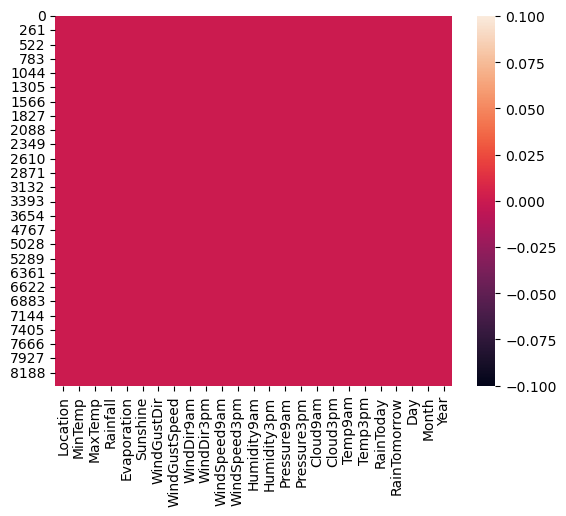

In [26]:
sns.heatmap(df.isnull())

In [27]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,13.109145,24.098345,2.780148,5.302395,7.890896,38.977663,12.782206,17.571150,67.506559,50.467147,1017.626311,1015.119923,4.336806,4.320988,17.895038,22.708561,15.737208,6.462141,2012.052203
std,5.540667,6.130123,10.482769,3.343713,2.733639,13.376457,9.787577,9.548634,17.182700,18.498341,6.027914,5.967638,2.474649,2.323276,5.722411,5.971845,8.793898,3.377471,2.301057
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.000000,19.600000,0.000000,4.000000,7.890896,30.000000,6.000000,11.000000,56.000000,38.000000,1014.200000,1011.500000,2.000000,3.000000,13.900000,18.400000,8.000000,4.000000,2010.000000
50%,13.109145,23.500000,0.000000,5.302395,7.890896,38.977663,11.000000,17.000000,68.000000,50.000000,1017.626311,1015.119923,4.336806,4.320988,17.900000,22.300000,16.000000,6.000000,2012.000000
75%,17.400000,28.400000,1.200000,5.302395,9.200000,46.000000,19.000000,24.000000,80.000000,62.000000,1020.900000,1018.400000,7.000000,6.000000,22.200000,26.800000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


Start with Enlisting Value counts & Sub-categories of different categorial features available

# Spliting feature in categorical and numerical variable

In [31]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Day', 'Month', 'Year'], float64: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], object: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']}

In [34]:
Category = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
    
Numerical = ['Day', 'Month', 'Year','MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

In [35]:
df[Category].describe().T.style.background_gradient(cmap='summer_r')

,count,unique,top,freq
Location,6762,12,PerthAirport,1204
WindGustDir,6762,16,E,1460
WindDir9am,6762,16,N,1403
WindDir3pm,6762,16,SE,971
RainToday,6762,2,No,5190
RainTomorrow,6762,2,No,5190


# Start with Enlisting Value counts & Sub-categories of different categorial features available

In [36]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print("="*100)

Location
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64
WindGustDir
E      1460
SW      465
N       459
W       434
WSW     420
WNW     398
SSE     390
S       376
SE      370
ENE     357
NE      300
SSW     299
NW      296
NNE     287
ESE     267
NNW     184
Name: WindGustDir, dtype: int64
WindDir9am
N      1403
SW      590
NW      463
SE      439
ENE     397
WSW     394
SSW     368
NE      364
E       338
NNE     337
S       324
WNW     301
SSE     300
W       299
ESE     229
NNW     216
Name: WindDir9am, dtype: int64
WindDir3pm
SE     971
WSW    499
S      493
NE     480
SW     428
SSE    421
NW     400
W      399
E      392
WNW    389
ESE    363
N      354
ENE    348
NNE    305
SSW    277
NNW    243
Name: WindDir3pm, dtype: int64
RainToday
No     5190


In [104]:
df.describe()

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,RainToday,RainTomorrow,Day,Month,Year
count,6409.000000,6409.000000,6.409000e+03,6.409000e+03,6.409000e+03,6409.000000,6409.000000,6409.000000,6409.000000,6.409000e+03,...,6409.000000,6409.000000,6409.000000,6409.000000,6409.000000,6.409000e+03,6.409000e+03,6409.000000,6409.000000,6409.000000
mean,5.289905,13.016775,-1.773862e-17,-3.281645e-16,-3.192952e-16,6.597441,38.081886,7.012326,7.848026,3.547725e-17,...,67.621525,50.392008,4.300534,4.280158,17.825175,6.208518e-17,5.765053e-17,15.699485,6.450460,2012.044469
std,3.083406,5.540592,1.000078e+00,1.000078e+00,1.000078e+00,5.237574,12.246086,4.546542,4.478796,1.000078e+00,...,16.926708,18.206232,2.473809,2.320043,5.687165,1.000078e+00,1.000078e+00,8.790753,3.352858,2.284546
min,0.000000,-2.000000,-7.287697e-01,-2.723821e+00,-2.405607e+00,0.000000,7.000000,0.000000,0.000000,-1.893426e+00,...,16.000000,6.000000,0.000000,0.000000,1.900000,-5.356751e-01,-5.359163e-01,1.000000,1.000000,2008.000000
25%,2.000000,8.900000,-7.287697e-01,-4.618834e-01,-8.620377e-02,1.000000,30.000000,3.000000,4.000000,-5.120488e-01,...,56.000000,38.000000,2.000000,2.000000,13.800000,-5.356751e-01,-5.359163e-01,8.000000,4.000000,2010.000000
50%,6.000000,13.109145,-7.287697e-01,1.602115e-01,-8.620377e-02,7.000000,38.977663,7.000000,9.000000,1.267085e-01,...,68.000000,50.000000,4.336806,4.320988,17.895038,-5.356751e-01,-5.359163e-01,16.000000,6.000000,2012.000000
75%,8.000000,17.300000,1.369680e+00,1.602115e-01,4.618548e-01,12.000000,44.000000,11.000000,12.000000,8.366555e-01,...,80.000000,62.000000,7.000000,6.000000,22.100000,-5.356751e-01,-5.359163e-01,23.000000,9.000000,2014.000000
max,11.000000,28.300000,1.510393e+00,3.679768e+00,2.525814e+00,15.000000,78.000000,15.000000,15.000000,2.050606e+00,...,100.000000,99.000000,8.000000,8.000000,34.500000,1.866803e+00,1.865963e+00,31.000000,12.000000,2017.000000


# Data Visualization

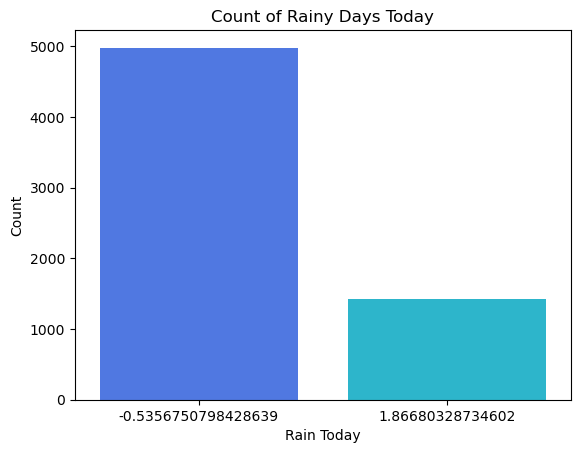

-0.535675    4980
 1.866803    1429
Name: RainToday, dtype: int64


In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the weather data
ax = sns.countplot(x='RainToday', data=df)
plt.title('Count of Rainy Days Today')
plt.xlabel('Rain Today')
plt.ylabel('Count')
plt.show()

print(df['RainToday'].value_counts())


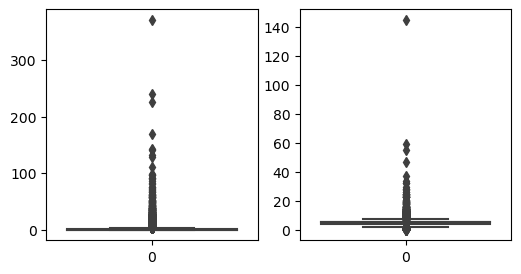

In [40]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
sns.boxplot(df['Rainfall'])
plt.subplot(1,2,2)
sns.boxplot(df['Evaporation'])
plt.show()

We can clearly see some outliers in these columns

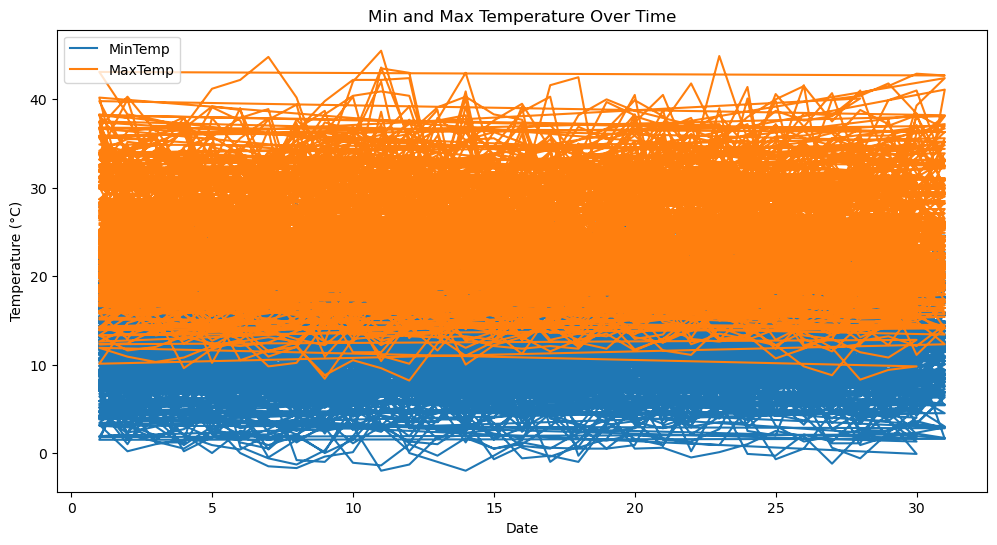

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(df['Day'], df['MinTemp'], label='MinTemp')
plt.plot(df['Day'], df['MaxTemp'], label='MaxTemp')
plt.title('Min and Max Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

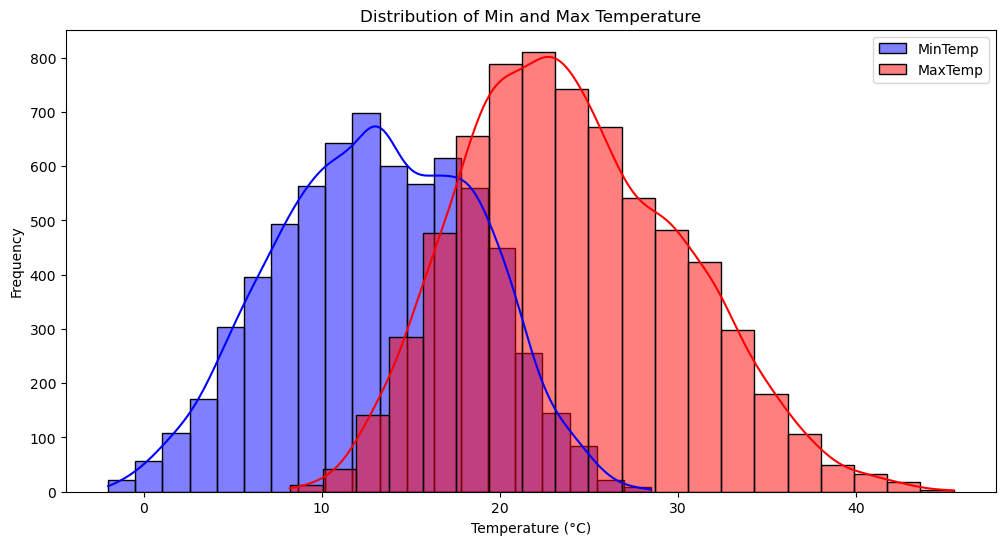

In [43]:
plt.figure(figsize=(12, 6))
sns.histplot(df['MinTemp'], bins=20, kde=True, color='blue', label='MinTemp')
sns.histplot(df['MaxTemp'], bins=20, kde=True, color='red', label='MaxTemp')
plt.title('Distribution of Min and Max Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

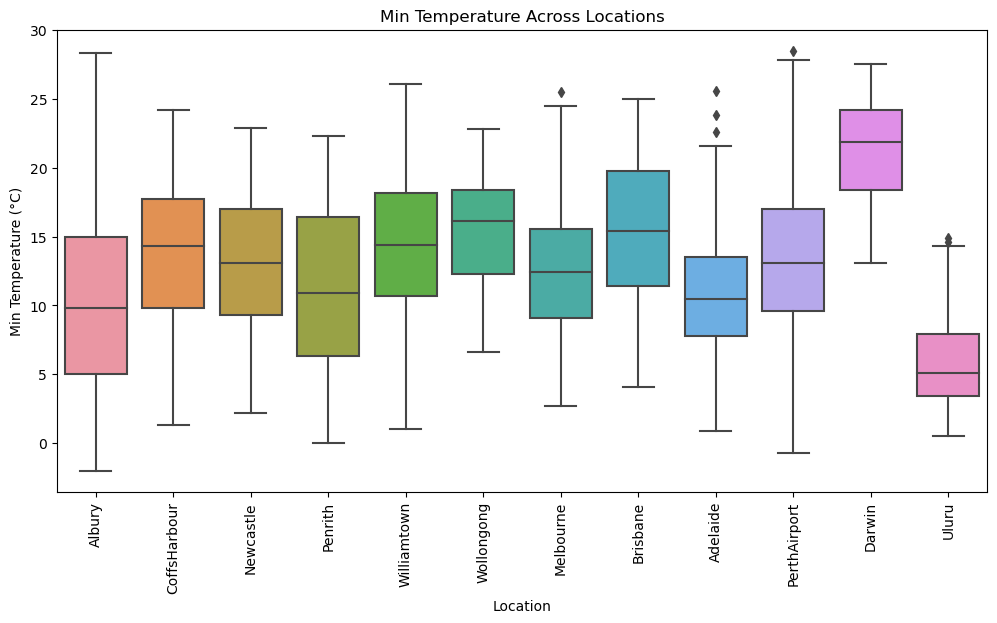

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='MinTemp', data=df)
plt.title('Min Temperature Across Locations')
plt.xlabel('Location')
plt.ylabel('Min Temperature (°C)')
plt.xticks(rotation=90)
plt.show()


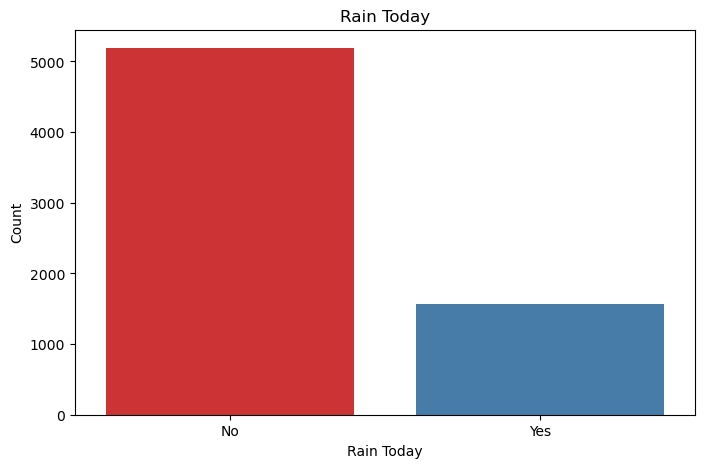

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(x='RainToday', data=df, palette='Set1')
plt.title('Rain Today')
plt.xlabel('Rain Today')
plt.ylabel('Count')
plt.show()


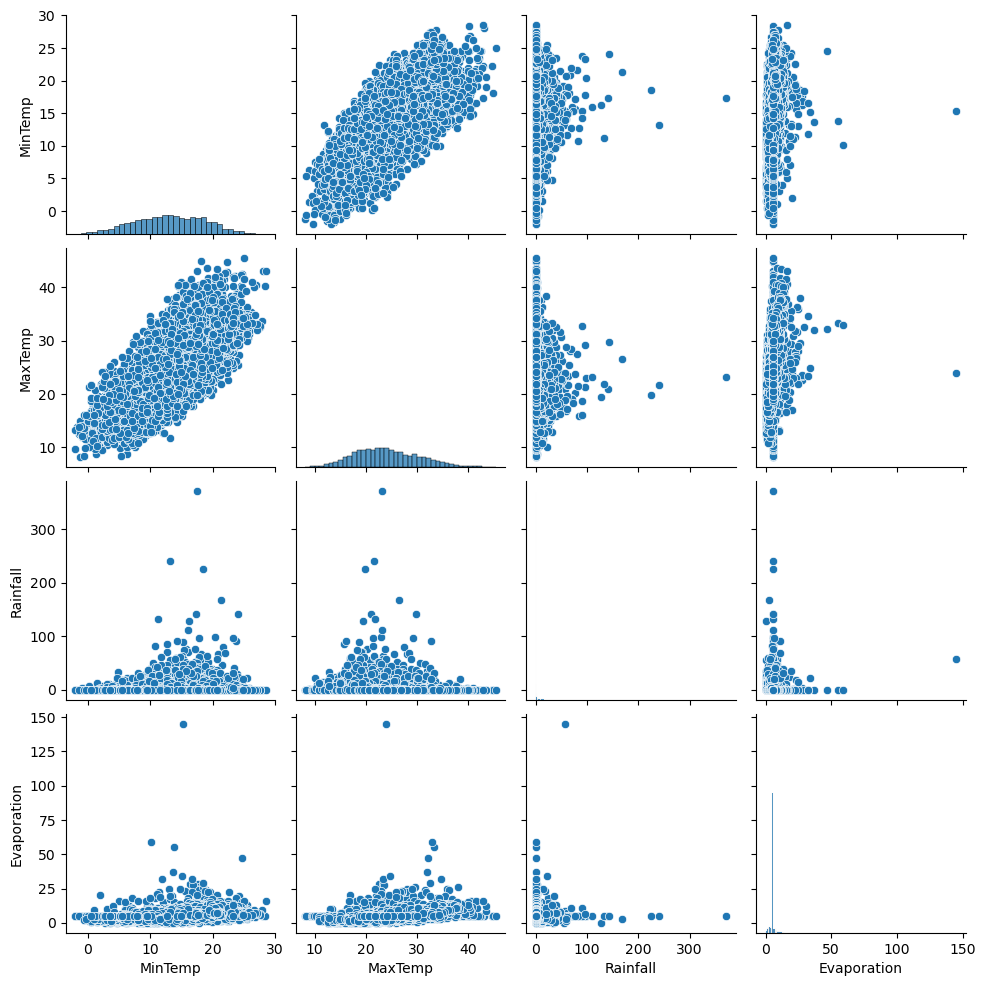

In [46]:
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation']].dropna())
plt.show()


# Encoding categorical data

In [47]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Day', 'Month', 'Year'], float64: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], object: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']}

In [48]:
Category = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,5.302395,7.890896,13,44.0,13,14,...,1007.1,8.000000,4.320988,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.0,5.302395,7.890896,14,44.0,6,15,...,1007.8,4.336806,4.320988,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.0,5.302395,7.890896,15,46.0,13,15,...,1008.7,4.336806,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.0,5.302395,7.890896,4,24.0,9,0,...,1012.8,4.336806,4.320988,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.0,5.302395,7.890896,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


# Feature selection and Engineering

# 1. Outliers Detection and Removal

In [49]:
df.shape

(6762, 25)

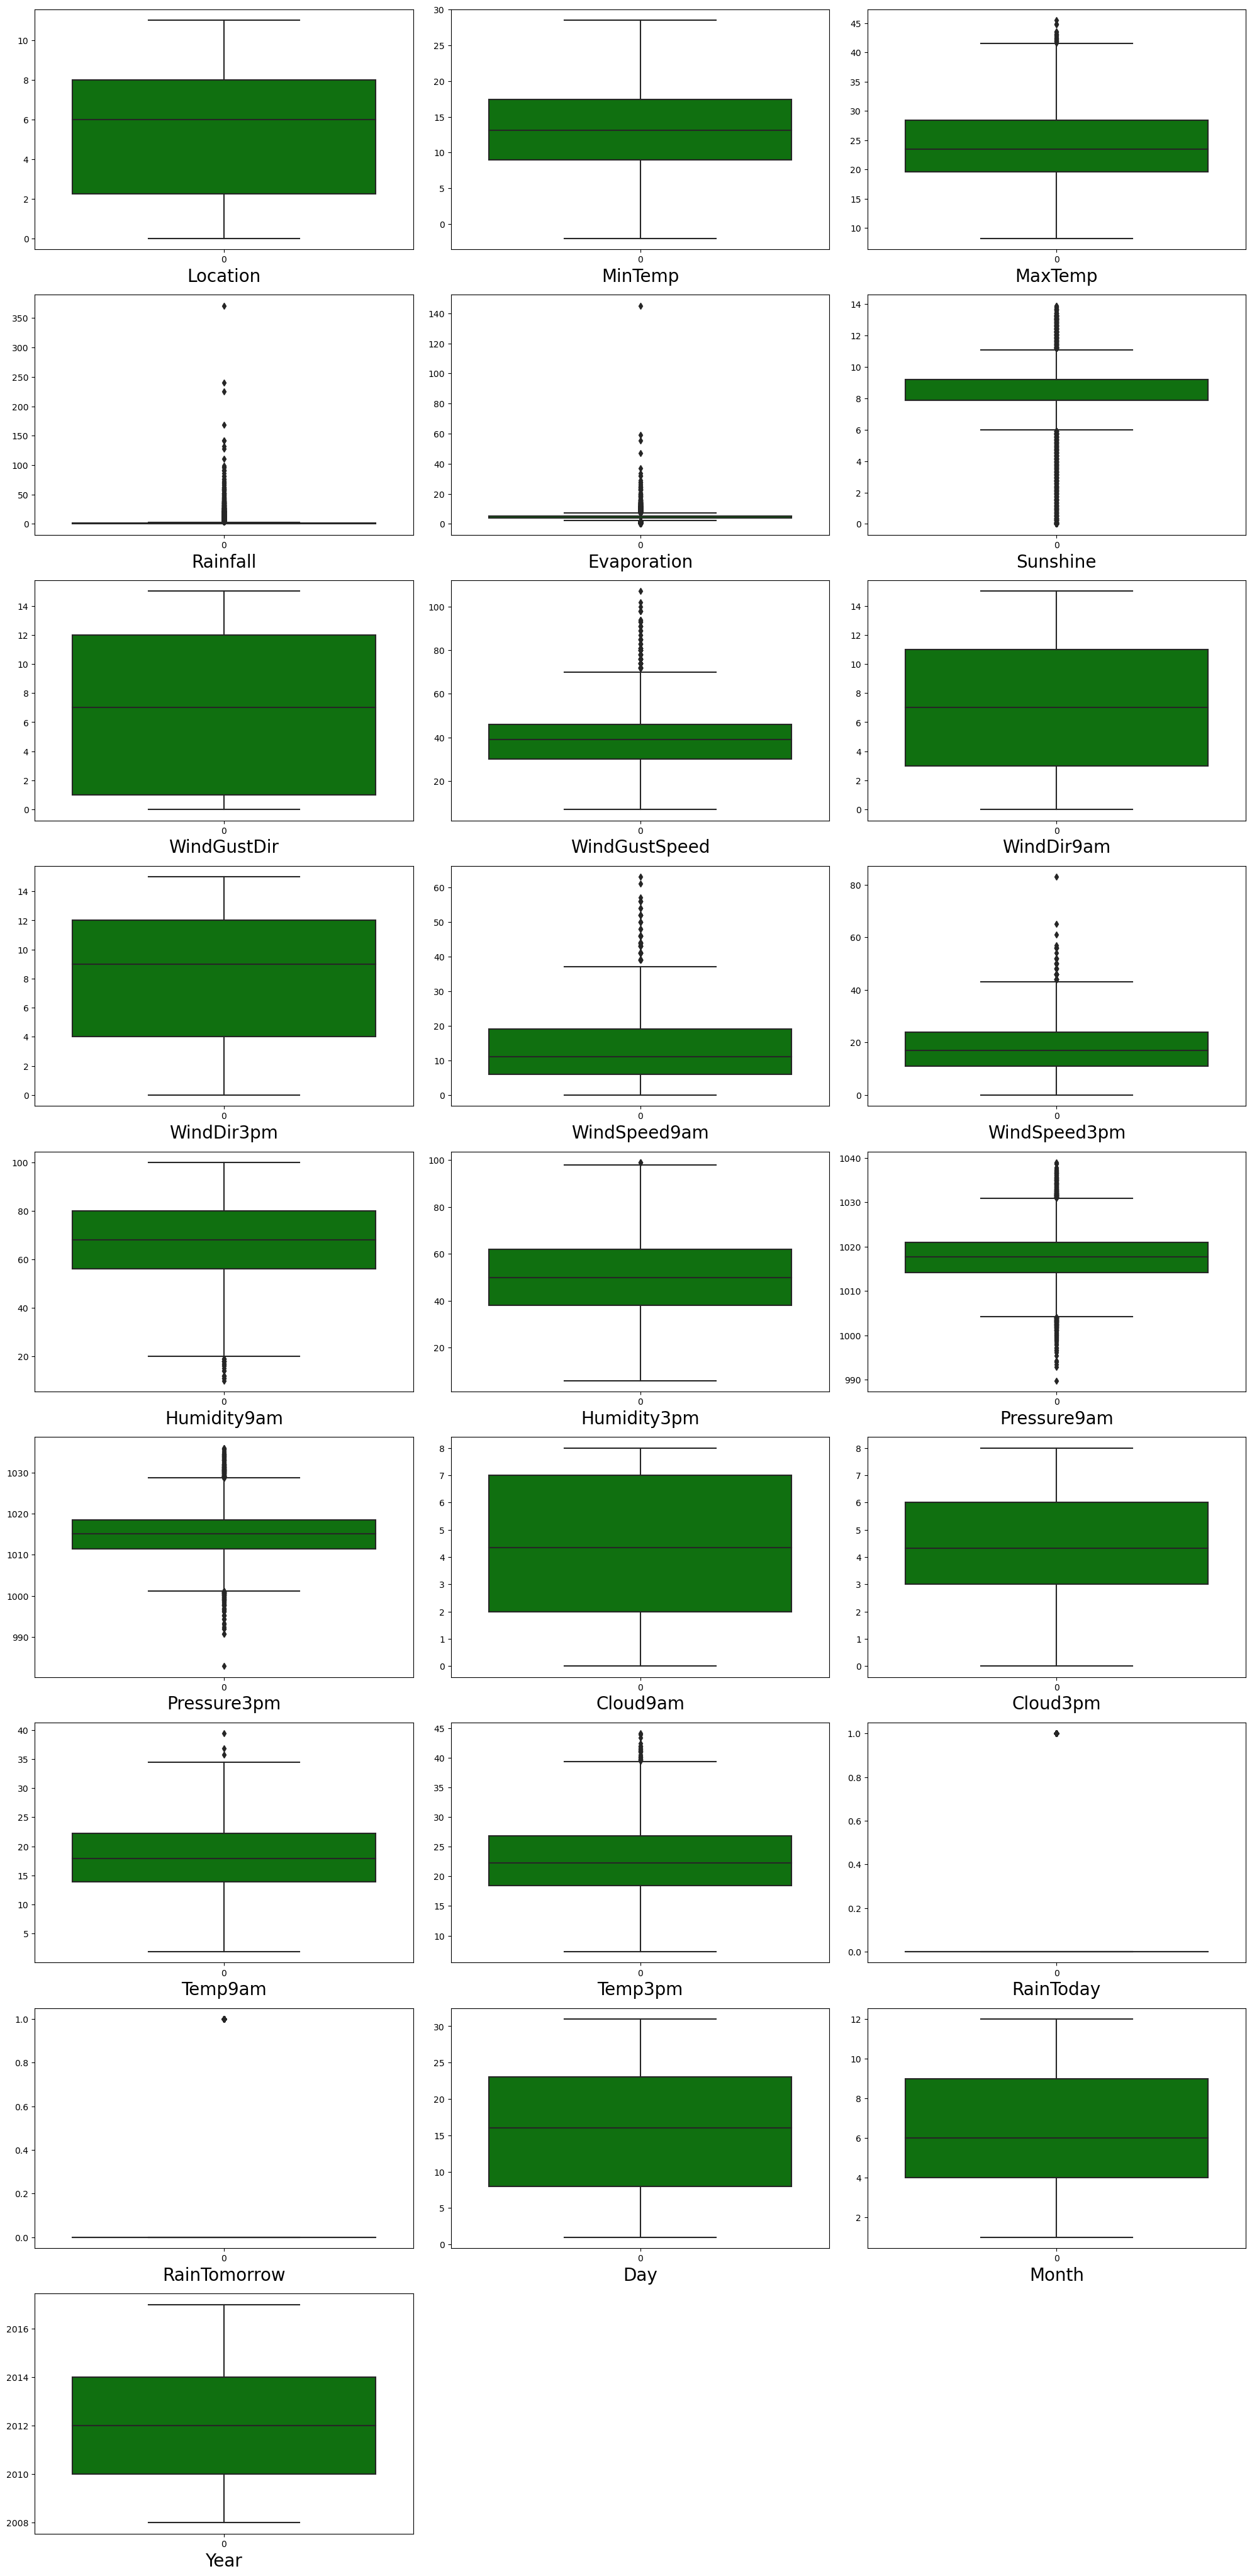

In [51]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

From Boxplot we can see outliers exist dataset.

In [52]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (6762, 25)
Shape of the dataframe after removing outliers:  (6409, 25)
Percentage of data loss post outlier removal:  5.220349009168885


# 2. Skewness of features

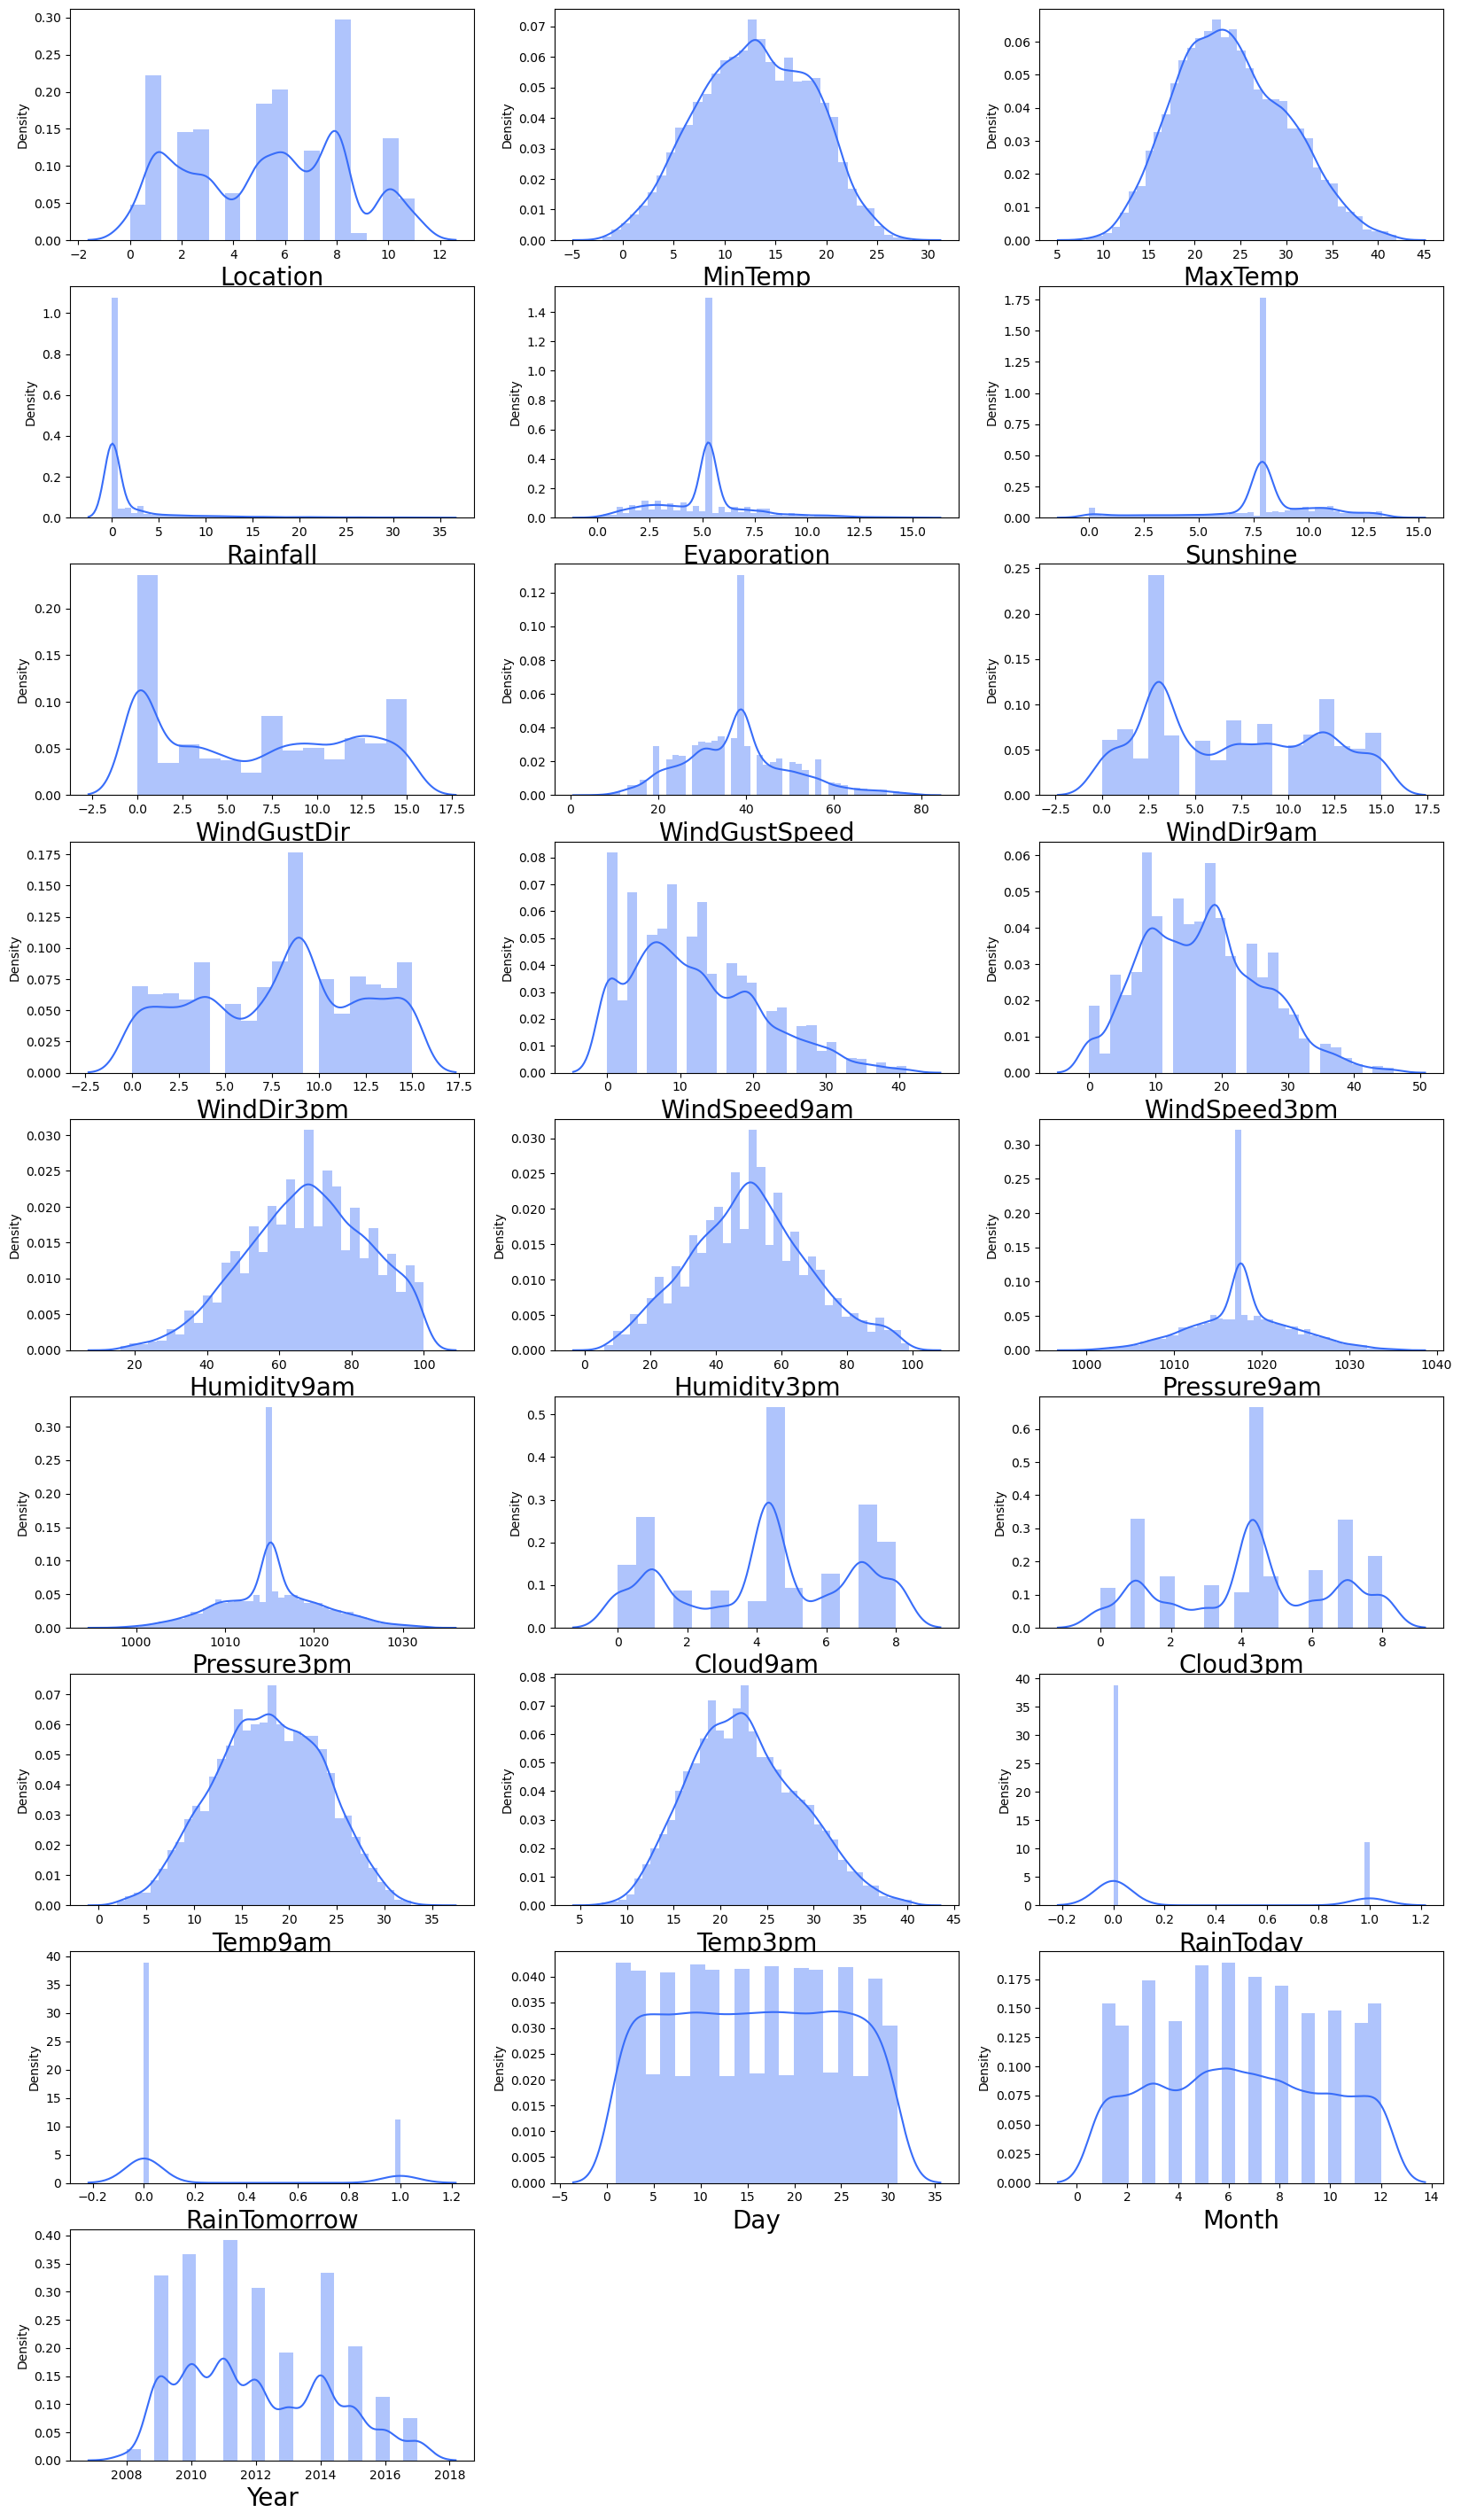

In [53]:
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [55]:
df.skew()

Location         0.004558
MinTemp         -0.079107
MaxTemp          0.265797
Rainfall         3.515410
Evaporation      0.721400
Sunshine        -0.890629
WindGustDir      0.103596
WindGustSpeed    0.477235
WindDir9am       0.210848
WindDir3pm      -0.128886
WindSpeed9am     0.677433
WindSpeed3pm     0.341549
Humidity9am     -0.233044
Humidity3pm      0.158509
Pressure9am      0.064023
Pressure3pm      0.090093
Cloud9am        -0.203578
Cloud3pm        -0.147217
Temp9am         -0.072513
Temp3pm          0.290192
RainToday        1.331440
RainTomorrow     1.330358
Day              0.004771
Month            0.032770
Year             0.352924
dtype: float64

In [61]:
skew=['Rainfall']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

In [62]:
df.skew()

Location         0.004558
MinTemp         -0.079107
MaxTemp          0.265797
Rainfall         0.675913
Evaporation      0.057096
Sunshine        -0.292707
WindGustDir      0.103596
WindGustSpeed    0.477235
WindDir9am       0.210848
WindDir3pm      -0.128886
WindSpeed9am    -0.345426
WindSpeed3pm    -0.235196
Humidity9am     -0.233044
Humidity3pm      0.158509
Pressure9am      0.064023
Pressure3pm      0.090093
Cloud9am        -0.203578
Cloud3pm        -0.147217
Temp9am         -0.072513
Temp3pm          0.290192
RainToday        1.331440
RainTomorrow     1.330358
Day              0.004771
Month            0.032770
Year             0.352924
dtype: float64

# 3. Corrleation

In [63]:
df.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.091439,0.073529,0.015584,0.119368,0.059422,-0.087036,0.275369,-0.102857,-0.000346,...,-0.018320,-0.006174,-0.005406,0.098705,0.069773,-0.004653,0.000418,-0.004955,-0.070870,0.504670
MinTemp,0.091439,1.000000,0.730203,0.061369,0.360388,0.068708,-0.141975,0.243945,-0.021262,-0.143715,...,-0.447642,0.095244,0.045078,0.892887,0.699067,0.072751,0.093202,0.018823,-0.235576,0.033619
MaxTemp,0.073529,0.730203,1.000000,-0.259202,0.470592,0.375813,-0.203423,0.170578,-0.193433,-0.165553,...,-0.426387,-0.240845,-0.239589,0.865352,0.974864,-0.219715,-0.158541,0.020013,-0.173102,0.084633
Rainfall,0.015584,0.061369,-0.259202,1.000000,-0.215357,-0.295299,0.112453,0.062808,0.149068,0.116492,...,-0.029766,0.321197,0.282877,-0.124477,-0.270975,0.791122,0.314033,-0.016066,0.011114,0.032698
Evaporation,0.119368,0.360388,0.470592,-0.215357,1.000000,0.419421,-0.139378,0.203368,-0.131668,-0.025575,...,-0.305079,-0.111683,-0.160295,0.421485,0.459433,-0.180666,-0.108682,0.005684,-0.050896,0.124643
Sunshine,0.059422,0.068708,0.375813,-0.295299,0.419421,1.000000,-0.098431,0.052714,-0.083563,-0.059142,...,-0.096558,-0.549403,-0.570617,0.269654,0.393707,-0.242266,-0.332193,-0.001661,0.000550,0.032642
WindGustDir,-0.087036,-0.141975,-0.203423,0.112453,-0.139378,-0.098431,1.000000,-0.005278,0.382238,0.455730,...,-0.007103,0.113797,0.074331,-0.158044,-0.214280,0.108601,0.034610,0.016953,0.033051,-0.184693
WindGustSpeed,0.275369,0.243945,0.170578,0.062808,0.203368,0.052714,-0.005278,1.000000,-0.070025,0.090029,...,-0.327380,-0.001037,0.036077,0.224148,0.138991,0.077282,0.163628,-0.003702,0.049319,-0.014431
WindDir9am,-0.102857,-0.021262,-0.193433,0.149068,-0.131668,-0.083563,0.382238,-0.070025,1.000000,0.207631,...,0.058118,0.070864,0.054555,-0.067048,-0.202146,0.149524,0.034901,-0.007416,0.022424,-0.083633
WindDir3pm,-0.000346,-0.143715,-0.165553,0.116492,-0.025575,-0.059142,0.455730,0.090029,0.207631,1.000000,...,-0.040758,0.070165,0.049111,-0.150565,-0.176777,0.095603,-0.000224,0.001373,0.029937,0.005251


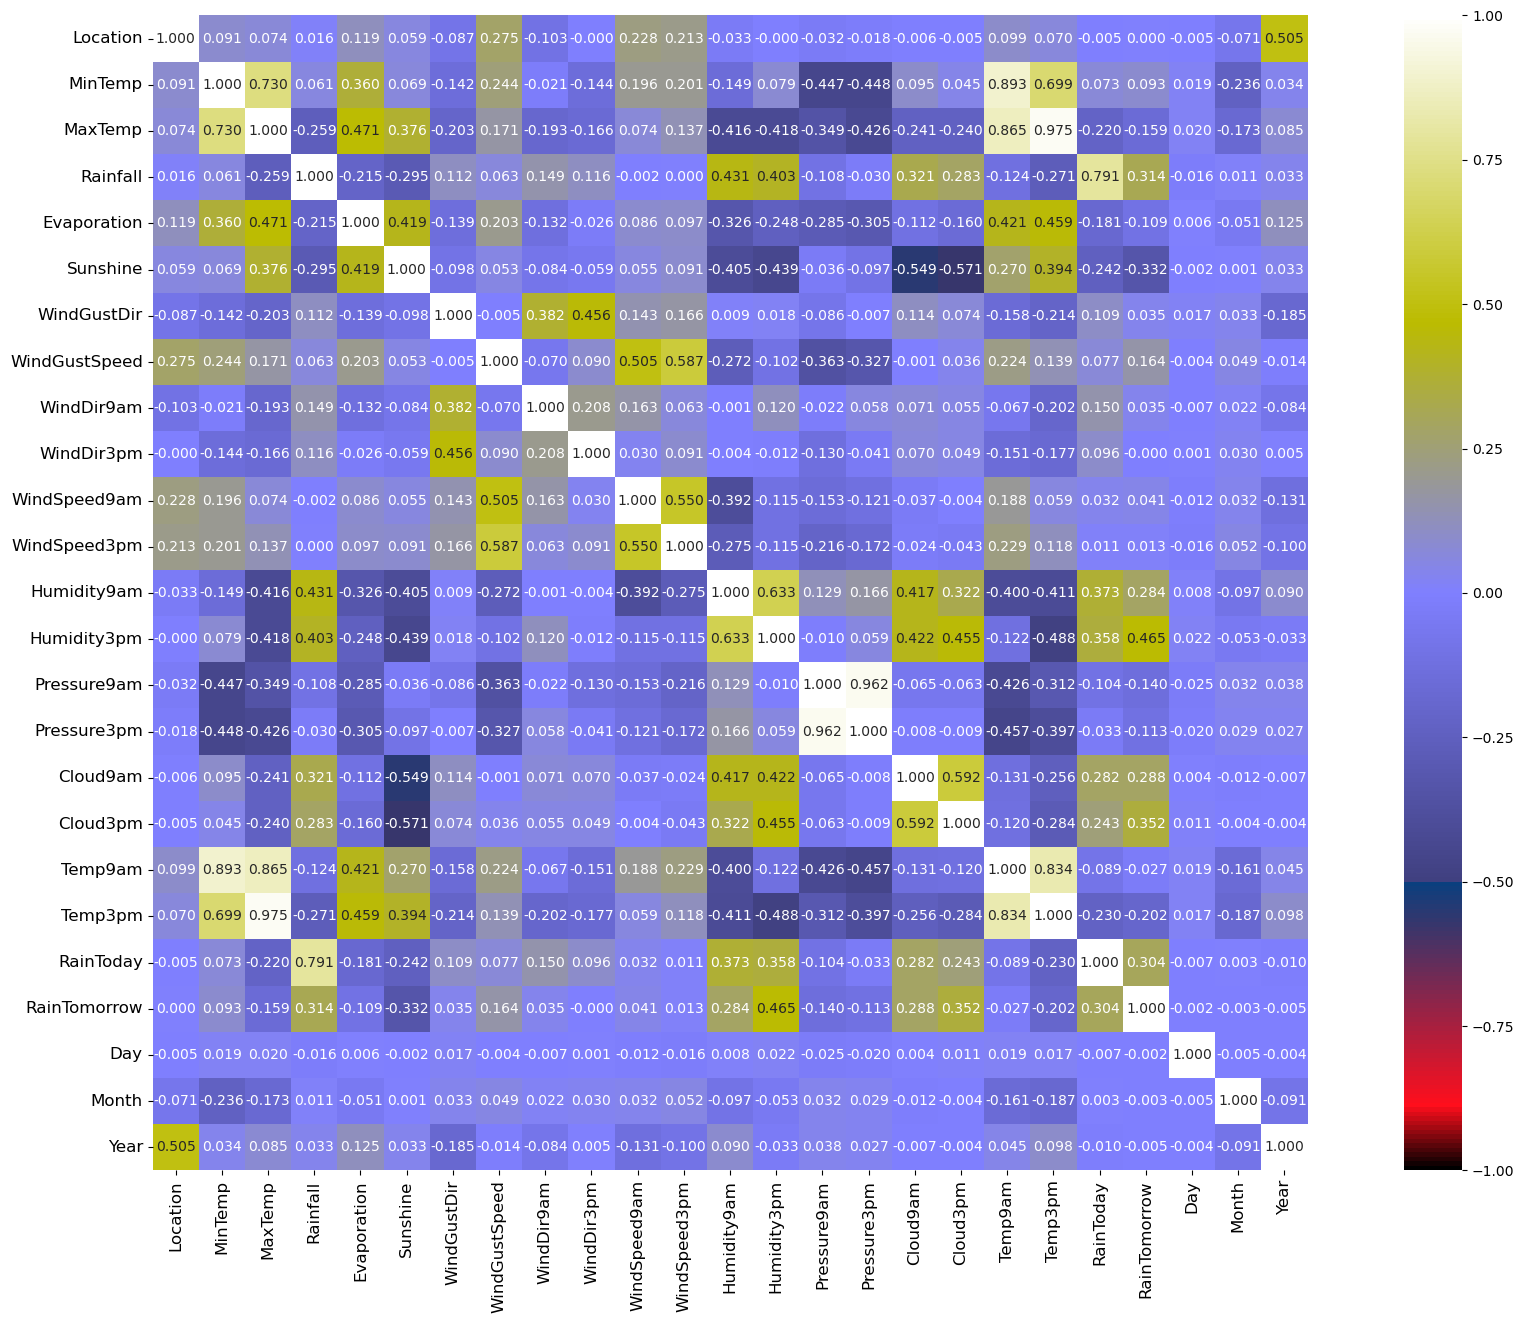

In [64]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

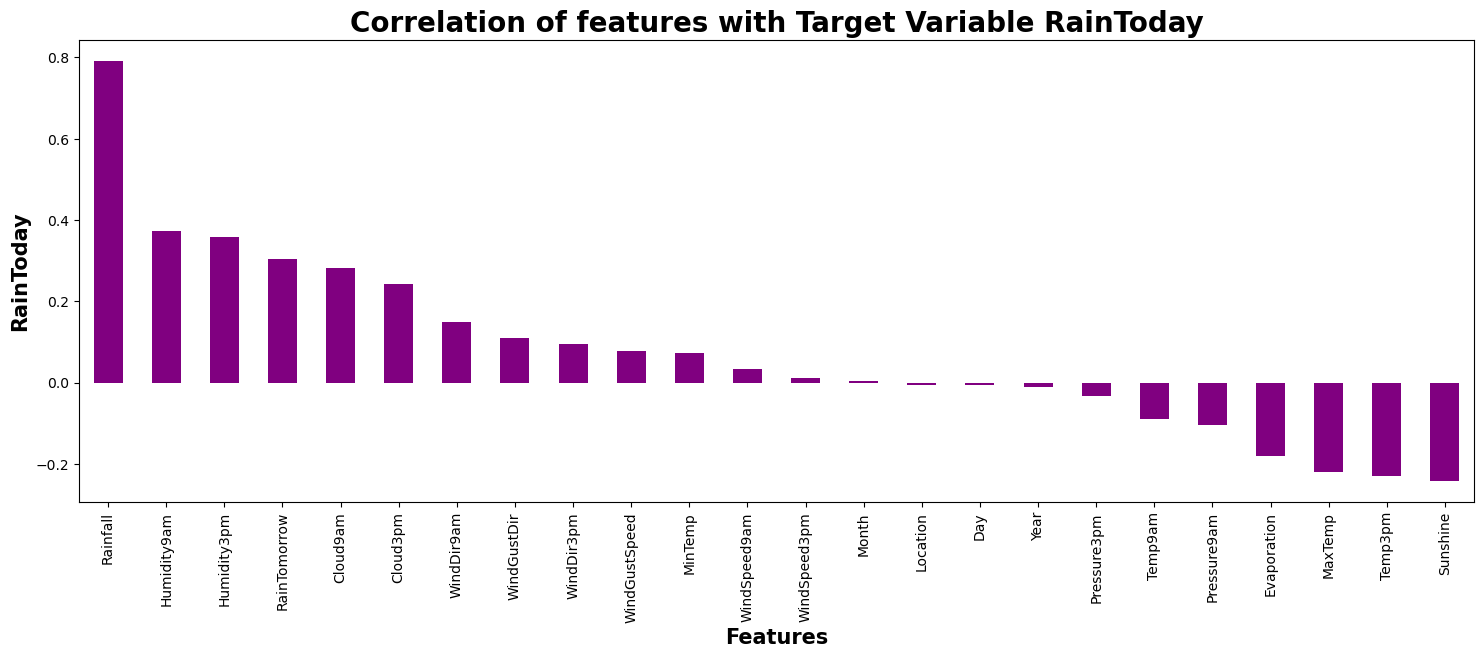

In [65]:
plt.figure(figsize = (18,6))
df.corr()['RainToday'].drop(['RainToday']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('RainToday',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable RainToday',fontsize = 20,fontweight='bold')
plt.show()

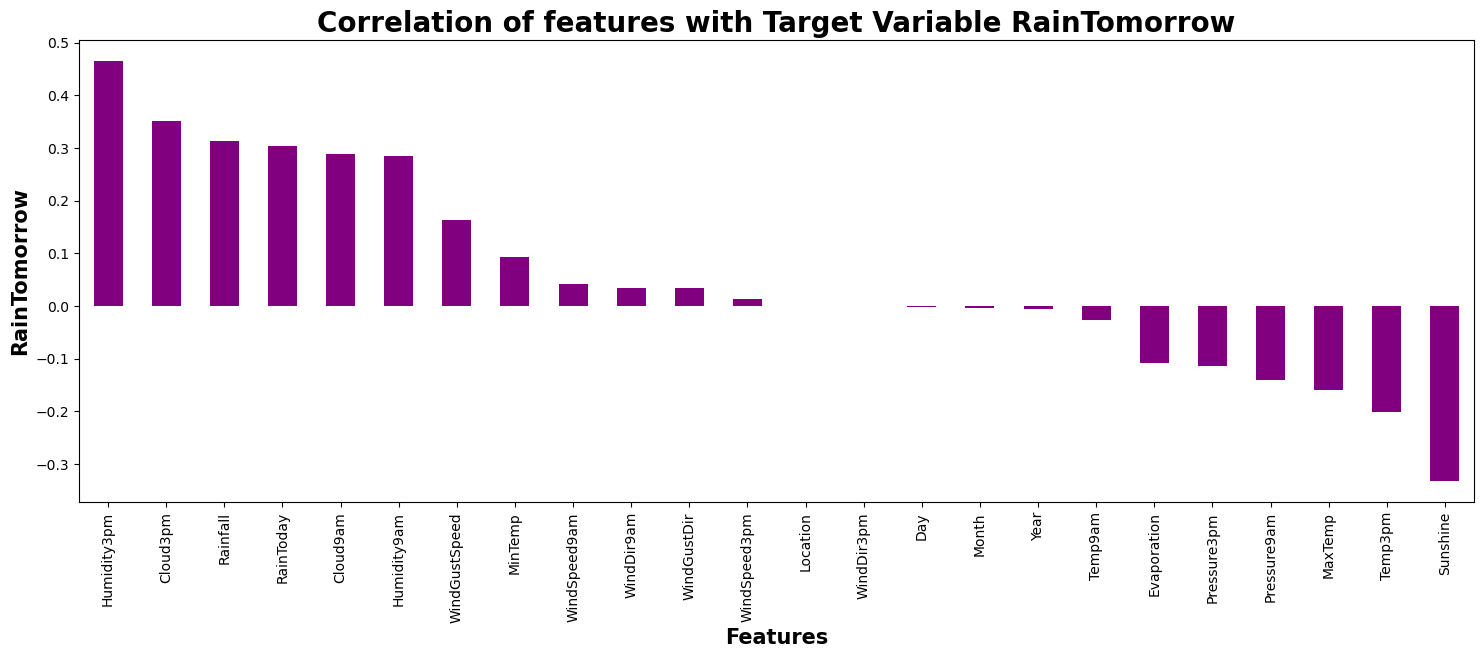

In [66]:
plt.figure(figsize = (18,6))
df.corr()['RainTomorrow'].drop(['RainTomorrow']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('RainTomorrow',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable RainTomorrow',fontsize = 20,fontweight='bold')
plt.show()

# Encoding categorical columns

In [95]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df. columns:
    if df[i].dtypes== 'object':
        df[i] = OE. fit_transform(df[i].values .reshape(-1, 1))

In [96]:
df

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,1.272317,0.160212,-0.086204,13,44.000000,13,14,0.909818,...,71.0,22.0,8.000000,4.320988,16.9,-0.535675,-0.535916,1,12,2008
1,1,7.4,-0.728770,0.160212,-0.086204,14,44.000000,6,15,-0.853795,...,44.0,25.0,4.336806,4.320988,17.2,-0.535675,-0.535916,2,12,2008
2,1,12.9,-0.728770,0.160212,-0.086204,15,46.000000,13,15,0.836655,...,38.0,30.0,4.336806,2.000000,21.0,-0.535675,-0.535916,3,12,2008
3,1,9.2,-0.728770,0.160212,-0.086204,4,24.000000,9,0,0.126709,...,45.0,16.0,4.336806,4.320988,18.1,-0.535675,-0.535916,4,12,2008
4,1,17.5,1.369680,0.160212,-0.086204,13,41.000000,1,7,-0.364309,...,82.0,33.0,7.000000,8.000000,17.8,-0.535675,-0.535916,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,-0.728770,0.160212,-0.086204,0,31.000000,9,1,0.330188,...,51.0,24.0,4.336806,4.320988,10.1,-0.535675,-0.535916,21,6,2017
8421,9,3.6,-0.728770,0.160212,-0.086204,6,22.000000,9,3,0.330188,...,56.0,21.0,4.336806,4.320988,10.9,-0.535675,-0.535916,22,6,2017
8422,9,5.4,-0.728770,0.160212,-0.086204,3,37.000000,9,14,-0.101993,...,53.0,24.0,4.336806,4.320988,12.5,-0.535675,-0.535916,23,6,2017
8423,9,7.8,-0.728770,0.160212,-0.086204,9,28.000000,10,3,0.330188,...,51.0,24.0,3.000000,2.000000,15.1,-0.535675,-0.535916,24,6,2017


# Machine Learning Model Building For RainToday

In [97]:
# Splitting data in target and dependent feature
X = df.drop(['RainToday'], axis =1)
Y = df['RainToday']


In [98]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Checking Multicollinearity between features using variance_inflation_factor

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif


,VIF values,Features
0,1.649123,Location
1,9.183400,MinTemp
2,1.468963,Rainfall
3,1.584597,Evaporation
4,2.136632,Sunshine
5,1.571564,WindGustDir
6,2.020030,WindGustSpeed
7,1.298154,WindDir9am
8,1.348883,WindDir3pm
9,1.990522,WindSpeed9am


In [100]:
high_vif_threshold = 10
high_vif_features = ['MaxTemp', 'Pressure9am', 'Pressure3pm', 'Temp3pm']
df.drop(high_vif_features, axis=1, inplace=True)


KeyError: "['MaxTemp', 'Pressure9am', 'Pressure3pm', 'Temp3pm'] not found in axis"

# PCA

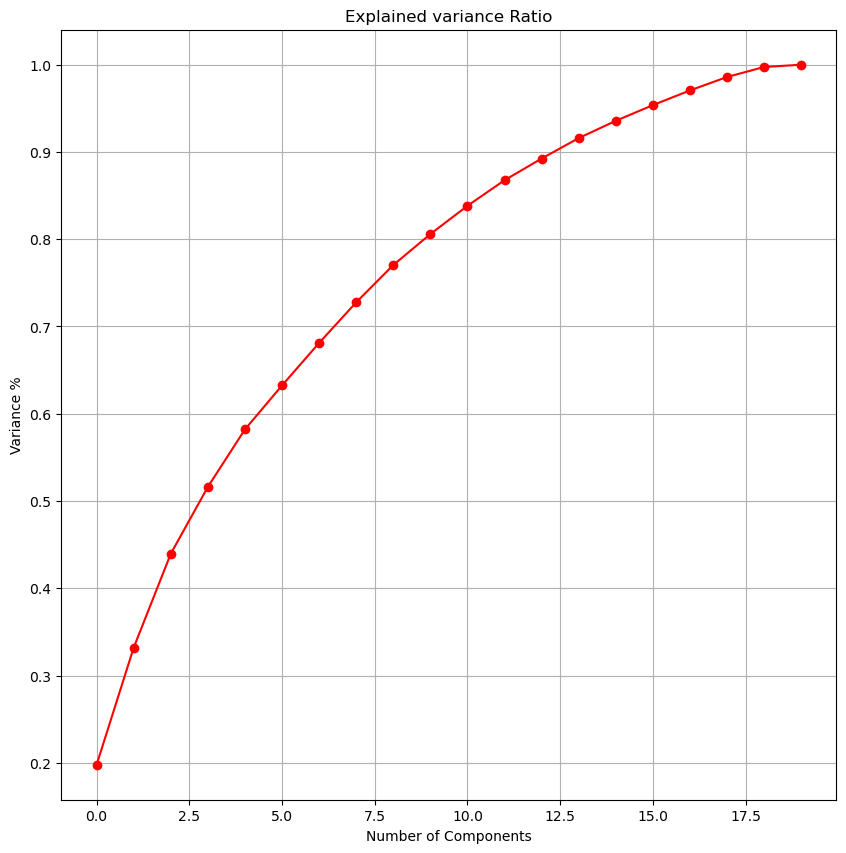

In [101]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

Comment -
AS per the graph, we can see that 15 principal components attribute for 90% of variation in the data. We shall pick the first 15 components for our prediction.

In [102]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(X_scale)

In [103]:
principle_x=pd.DataFrame(x_new,columns=np.arange(15))

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor


In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4294, 15)
Training target vector size: (4294,)
Test feature matrix size: (2115, 15)
Test target vector size: (2115,)


# Finding best Random state


In [92]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range (1, 200):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)
    RFR = RandomForestClassifier()
    RFR.fit(X_train, Y_train)
    pred = RFR. predict (X_test)
    acc = accuracy_score (Y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ("Best accuracy is ", maxAccu, "at random_state", maxRS)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

# Linear Regression Base Model

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=220, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [-0.53816976  0.24725142  0.83792464 ...  1.22271096  0.66345087
 -0.58978705]


Actual Wins:
 27     -0.535675
1933   -0.535675
7436   -0.535675
8075   -0.535675
7284   -0.535675
          ...   
424    -0.535675
2218   -0.535675
7334    1.866803
6574   -0.535675
1209   -0.535675
Name: RainToday, Length: 2115, dtype: float64


In [81]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.379959423734203
Mean squared error : 0.3383906515872465
Root Mean Squared Error: 0.5817135477081882


 R2 Score :
0.6725008593853182
